## Inferencia Bayesiana

### Ejemplo simple: moneda cargada

Lanzamos una moneda N veces y obtenemos C caras.


- **Prior (a priori)**: asumimos que la probabilidad de cara (p) es uniforme entre 0 y 1.
- **Likelihood (verosimilitud)**: la probabilidad de obtener 8 caras en 10 lanzamientos sigue una distribución binomial.
- **Posterior (a posteriori)**: combinamos prior y likelihood. En este caso, la posterior es una **Beta(1+caras, 1+sellos)**.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

**Función inferencia_moneda**

1. DATOS: 8 caras en 10 lanzamientos
2. PRIOR: Uniforme Beta(1,1)  
3. POSTERIOR: Beta(1+8, 1+2) = Beta(9,3)
4. GRÁFICOS. 3 paneles que muestran:
   - Cómo cambió la creencia
   - Qué pasaría si muestreamos
   - Qué pasa con priors diferentes

In [2]:
def inferencia_moneda(n_lanzamientos=10, caras_observadas=8):

    #Análisis inferencia bayesiana para una moneda

    # Datos observados
    sellos_observados = n_lanzamientos - caras_observadas
    
    print("=" * 50)
    print("INFERENCIA BAYESIANA - MONEDA")
    print("=" * 50)
    print(f"Total lanzamientos: {n_lanzamientos}")
    print(f"Caras observadas: {caras_observadas}")
    print(f"Sellos observados: {sellos_observados}")
    print(f"Tasa observada: {caras_observadas/n_lanzamientos:.1%}")
    print("-" * 50)
    
    # 1. PRIOR (creencia antes de los datos) --------------------------------------------------------
    alpha_prior = 1  # Uniforme = Beta(1,1)
    beta_prior = 1
    print(f"Prior: Beta({alpha_prior}, {beta_prior}) - Distribución uniforme")
    print(f"Sin datos, cualquier p es igualmente probable")
    
    # 2. POSTERIOR (creencia actualizada)    --------------------------------------------------------
    alpha_post = alpha_prior + caras_observadas # porque la verosimilitud es binomial
    beta_post = beta_prior + sellos_observados  # y Beta es su conjugada
    print(f"Posterior: Beta({alpha_post}, {beta_post})")
    
    # Estadísticos de la posterior
    media_post = alpha_post / (alpha_post + beta_post)
    varianza_post = (alpha_post * beta_post) / ((alpha_post + beta_post)**2 * (alpha_post + beta_post + 1))
    desv_est_post = np.sqrt(varianza_post)
    
    # 3. VISUALIZACIÓN             ------------------------------------------------------------------
    fig = plt.figure(figsize=(16, 6))
    
    # Creamos 3 subplots
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    
    fig.suptitle(f'Inferencia Bayesiana: Probabilidad de cara | {caras_observadas}/{n_lanzamientos} caras', 
                 fontsize=16, fontweight='bold')
    
    # Grilla para las distribuciones
    x = np.linspace(0.001, 0.999, 500)
    
    # A. Prior vs Posterior
    # Así cambió nuestra creencia después de ver los datos
    
    prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
    post_pdf = beta.pdf(x, alpha_post, beta_post)
    
    ax1.plot(x, prior_pdf, 'r--', linewidth=2, alpha=0.7, label=f'Prior Beta({alpha_prior},{beta_prior})')
    ax1.plot(x, post_pdf, 'b-', linewidth=2.5, label=f'Posterior Beta({alpha_post},{beta_post})')
    
    # Líneas verticales
    ax1.axvline(media_post, color='blue', linestyle=':', linewidth=2, alpha=0.8, label=f'Media: {media_post:.3f}')
   
    ax1.set_xlabel('Probabilidad de cara (p)')
    ax1.set_ylabel('Densidad')
    ax1.set_title('Prior vs posterior')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # B. Muestreo de la posterior
    # Si repitiéramos el experimento 1000 veces, estos serían los resultados
    
    n_muestras = 1000
    muestras = beta.rvs(alpha_post, beta_post, size=n_muestras)
    
    ax2.hist(muestras, bins=30, density=True, alpha=0.7, color='skyblue', 
             edgecolor='navy', label=f'{n_muestras:,} muestras')
    ax2.axvline(media_post, color='red', linestyle='--', linewidth=2, label='Media teórica')
    
    # Estadísticos de las muestras
    media_muestras = np.mean(muestras)
    ax2.axvline(media_muestras, color='orange', linestyle='-', linewidth=2, 
                alpha=0.8, label=f'Media muestras: {media_muestras:.3f}')
    
    ax2.set_xlabel('Probabilidad de cara (p)')
    ax2.set_ylabel('Densidad')
    ax2.set_title('Muestreo de la posterior')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # C. Comparación con diferentes priors
    # Estos serían nuestros resultados si hubiéramos tenido creencias diferentes al inicio
    
    priors = [
        ('Optimista', 5, 1),    # Cree que es probable cara
        ('Pesimista', 1, 5),    # Cree que es probable sello
        ('Uniforme', 1, 1),     # Sin información previa
        ('Informado', 3, 2)     # Alguna creencia previa
    ]
    
    colors = ['orange', 'purple', 'red', 'green']
    
    for i, (nombre, a_prior, b_prior) in enumerate(priors):
        a_post = a_prior + caras_observadas
        b_post = b_prior + sellos_observados
        post_pdf = beta.pdf(x, a_post, b_post)
        media_post_prior = a_post / (a_post + b_post)
        
        ax3.plot(x, post_pdf, color=colors[i], linewidth=2, 
                label=f'{nombre}: Beta({a_post:.0f},{b_post:.0f})')
        ax3.axvline(media_post_prior, color=colors[i], linestyle='--', alpha=0.7, linewidth=1)
    
    ax3.set_xlabel('Probabilidad de cara (p)')
    ax3.set_ylabel('Densidad')
    ax3.set_title('Efecto de diferentes priors')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    # 4. TABLA DE RESULTADOS E INTERPRETACIÓN -------------------------------------------------------
    print("\n" + "=" * 50)
    print("RESULTADOS RESUMIDOS")
    print("=" * 50)
    
    print(f"{'Estadístico':<20} {'Valor':<15} {'Interpretación':<40}")
    print("-" * 60)
    print(f"{'Proporción observada':<20} {caras_observadas/n_lanzamientos:<15.3f} {'Frecuentista (MLE)':<40}")
    print(f"{'Media posterior':<20} {media_post:<15.3f} {'Bayesiana con prior uniforme':<40}")

    print("\nINTERPRETACIÓN")

    print(f"  • Frecuentista: p = {caras_observadas/n_lanzamientos:.1%} (punto único)")
    print(f"  • Bayesiana: p ~ {media_post:.1%} ± {desv_est_post:.1%} (distribución completa)")


### Análisis

INFERENCIA BAYESIANA - MONEDA
Total lanzamientos: 10
Caras observadas: 8
Sellos observados: 2
Tasa observada: 80.0%
--------------------------------------------------
Prior: Beta(1, 1) - Distribución uniforme
Sin datos, cualquier p es igualmente probable
Posterior: Beta(9, 3)


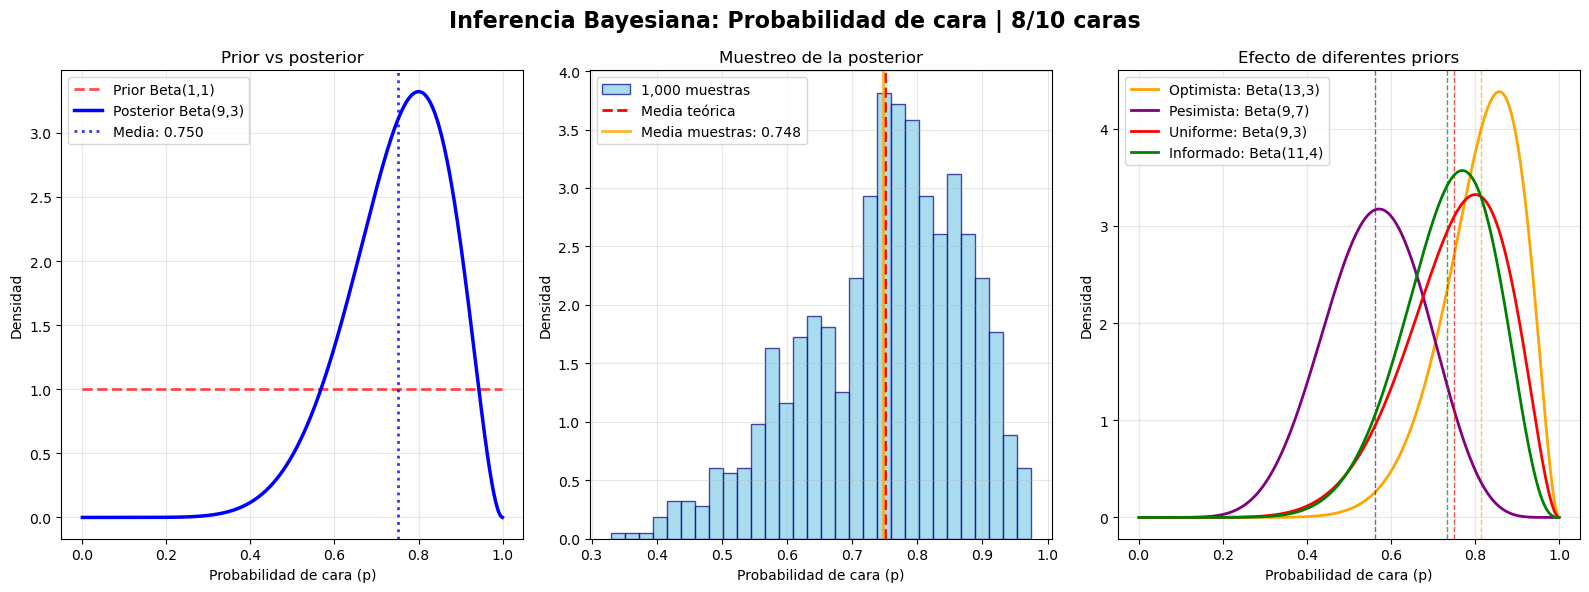


RESULTADOS RESUMIDOS
Estadístico          Valor           Interpretación                          
------------------------------------------------------------
Proporción observada 0.800           Frecuentista (MLE)                      
Media posterior      0.750           Bayesiana con prior uniforme            

INTERPRETACIÓN
  • Frecuentista: p = 80.0% (punto único)
  • Bayesiana: p ~ 75.0% ± 12.0% (distribución completa)


In [3]:
#
resultados = inferencia_moneda(n_lanzamientos=10, caras_observadas=8)

# otras opciones
#resultados = inferencia_moneda(20, 15)   # Muchas caras
#resultados = inferencia_moneda(100, 52)  # Moneda casi justa
#resultados = inferencia_moneda(50, 10)   # Pocas caras